In [1]:
import ehrapy.api as ep
import os

Unable to contact PyPI to check for the latest ehrapy version. Do you have an internet 
connection?

# Fetching the MIMIC II dataset already encoded

In [2]:
adata = ep.data.mimic_2(encode=True)

In [3]:
adata

AnnData object with n_obs × n_vars = 1776 × 46
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals', 'original_values_categoricals', 'current_encodings'
    layers: 'original'

In [4]:
ep.ec.type_overview(adata)

Variable names for AnnData object with 46 vars                                               
╠══ Obs                                                                                      
║   ╠══ service_unit 🔐; 3 different categories; currently one hot encoded                   
║   ╚══ day_icu_intime 🔐; 7 different categories; currently one hot encoded                 
╚══ 🔓 Unencoded variables                                                                   
    ╠══ aline_flg                                                                            
    ╠══ icu_los_day                                                                          
    ╠══ hospital_los_day                                                                     
    ╠══ age                                                                                  
    ╠══ gender_num                                                                           
    ╠══ weight_first                                                                         
    ╠══ bmi                                                                                  
    ╠══ sapsi_first                                                                          
    ╠══ sofa_first                                                                           
    ╠══ service_num                                                                          
    ╠══ day_icu_intime_num                                                                   
    ╠══ hour_icu_intime                                                                      
    ╠══ hosp_exp_flg                                                                         
    ╠══ icu_exp_flg                                                                          
    ╠══ day_28_flg                                                                           
    ╠══ mort_day_censored                                                                    
    ╠══ censor_flg                                                                           
    ╠══ sepsis_flg                                                                           
    ╠══ chf_flg                                                                              
    ╠══ afib_flg                                                                             
    ╠══ renal_flg                                                                            
    ╠══ liver_flg                                                                            
    ╠══ copd_flg                                                                             
    ╠══ cad_flg                                                                              
    ╠══ stroke_flg                                                                           
    ╠══ mal_flg                                                                              
    ╠══ resp_flg                                                                             
    ╠══ map_1st                                                                              
    ╠══ hr_1st                                                                               
    ╠══ temp_1st                                                                             
    ╠══ spo2_1st                                                                             
    ╠══ abg_count                                                                            
    ╠══ wbc_first                                                                            
    ╠══ hgb_first                                                                            
    ╠══ platelet_first                                                                       
    ╠══ sodium_first                                                                         
    ╠══ potassium_first                                                                      
    ╠══ tco2_first                                     

# Fetching the MIMIC II dataset and custom encoding it

In [5]:
adata_2 = ep.dt.mimic_2(encode=False)

In [6]:
adata_2 = ep.ec.encode(adata_2, encodings={"label_encoding": ["service_unit"], "count_encoding": ["day_icu_intime"]})

Output()

In [7]:
adata_2

AnnData object with n_obs × n_vars = 1776 × 46
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'original_values_categoricals', 'current_encodings'
    layers: 'original'

In [8]:
adata_2.obs

,service_unit,day_icu_intime
0,SICU,Friday
1,MICU,Saturday
2,MICU,Friday
3,SICU,Saturday
4,SICU,Saturday
...,...,...
1771,MICU,Sunday
1772,SICU,Saturday
1773,MICU,Tuesday
1774,SICU,Wednesday


In [9]:
adata_2 = ep.ec.encode(adata_2, encodings={"one_hot_encoding": ["service_unit", "day_icu_intime"]})

Output()

In [10]:
adata_2

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'original_values_categoricals', 'current_encodings'
    layers: 'original'

In [11]:
ep.io.write("mimic_2.h5ad", adata_2)

/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'service_unit' as categorical
/home/zeth/miniconda3/envs/ehrapy/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'day_icu_intime' as categorical


In [12]:
adata_3 = ep.io.read("mimic_2.h5ad")

In [13]:
adata_3

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'current_encodings', 'original_values_categoricals'
    layers: 'original'

# Preprocess the data

The data still contains some nan values. They must be removed.

In [14]:
import numpy as np

In [15]:
ep.pp.replace_explicit(adata_3, replacement=0)

AnnData object with n_obs × n_vars = 1776 × 54
    obs: 'service_unit', 'day_icu_intime'
    uns: 'categoricals_encoded_with_mode', 'current_encodings', 'original_values_categoricals'
    layers: 'original'

# Calculate PCA & UMAP

In [16]:
import scanpy as sc

In [17]:
sc.pp.pca(adata_3)

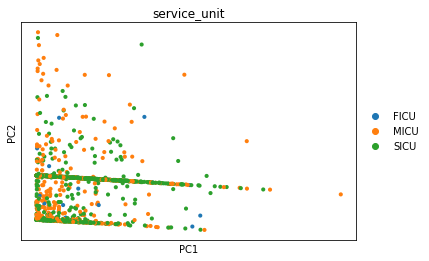

In [18]:
sc.pl.pca(adata_3, color="service_unit")

In [19]:
sc.pp.neighbors(adata_3)

In [20]:
sc.tl.umap(adata_3)

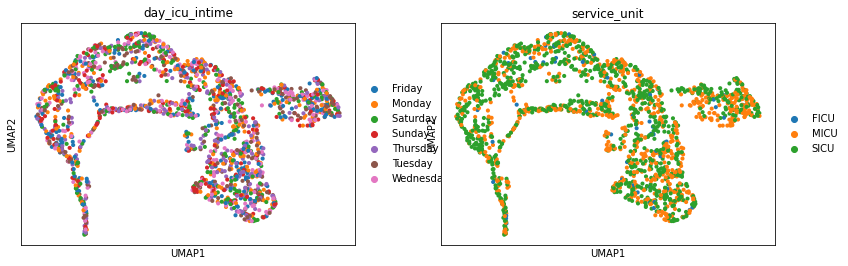

In [21]:
sc.pl.umap(adata_3, color=["day_icu_intime", "service_unit"])

In [22]:
sc.tl.leiden(adata_3,
             resolution=0.5,
             key_added="leiden_0_5")

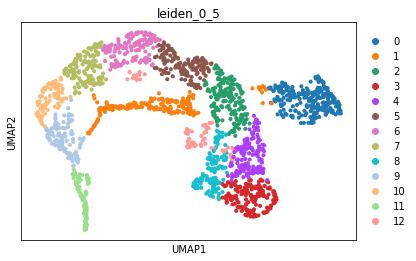

In [23]:
sc.pl.umap(adata_3, color=["leiden_0_5"])